In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
DATA = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_h1n1_2019-2023.csv", sep='\t')

In [125]:
DICT = {}
for v in DATA.values:
    DICT[v[0]]=list(v[1:])

In [137]:
DF = pd.DataFrame.from_dict(DICT)

In [145]:
DF.values.tolist()

[[12, 12, 1, 79, 117, 0, 0, 0, 0],
 [0, 0, 0, 2, 23, 23, 35, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 17, 0, 121, 26],
 [0, 0, 0, 0, 0, 1, 0, 516, 235]]

In [139]:
years = list([int(i) for i in DATA.columns[1:]])

In [140]:
years

[2019, 2020, 2021, 2022, 2023]

In [170]:
sample_list = DF.T.values.tolist()
clades = DF.columns

In [190]:
# calculate the normalized totals
total_sample_per_clade = np.sum(sample_list, axis=1)
normalized_totals = total_sample_per_clade / np.max(total_sample_per_clade)
cmap = plt.cm.nipy_spectral_r
colors = cmap(normalized_totals)


In [191]:
normalized_totals

array([0.01880878, 0.01880878, 0.0015674 , 0.12695925, 0.21943574,
       0.06426332, 0.05485893, 1.        , 0.40909091])

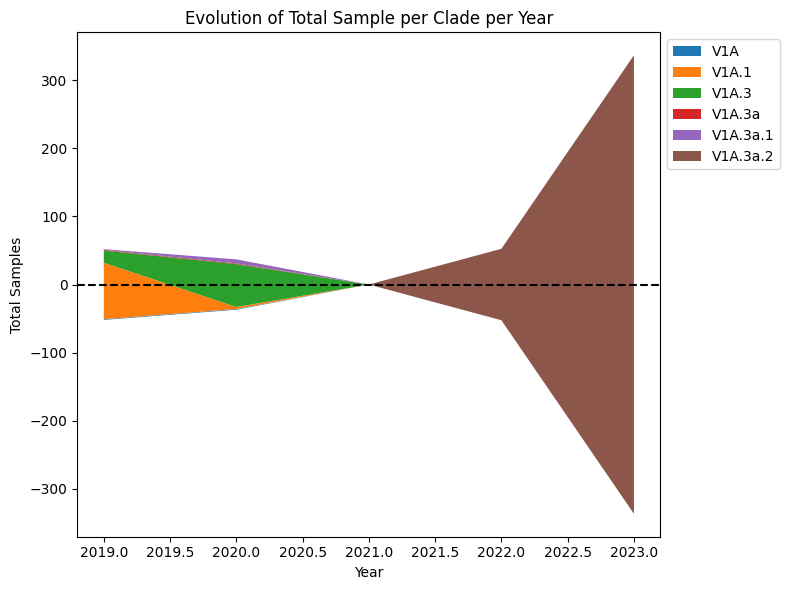

In [394]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0)
ax.stackplot(years, sample_list, labels=clades, baseline="sym")
ax.set_title('Evolution of Total Sample per Clade per Year')
ax.set_ylabel('Total Samples')
ax.set_xlabel('Year')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.axhline(0, color="black", ls="--");
#plt.gca().get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

C:\Users\vinicius.souza\AppData\Local\Temp\ipykernel_36336\936065012.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


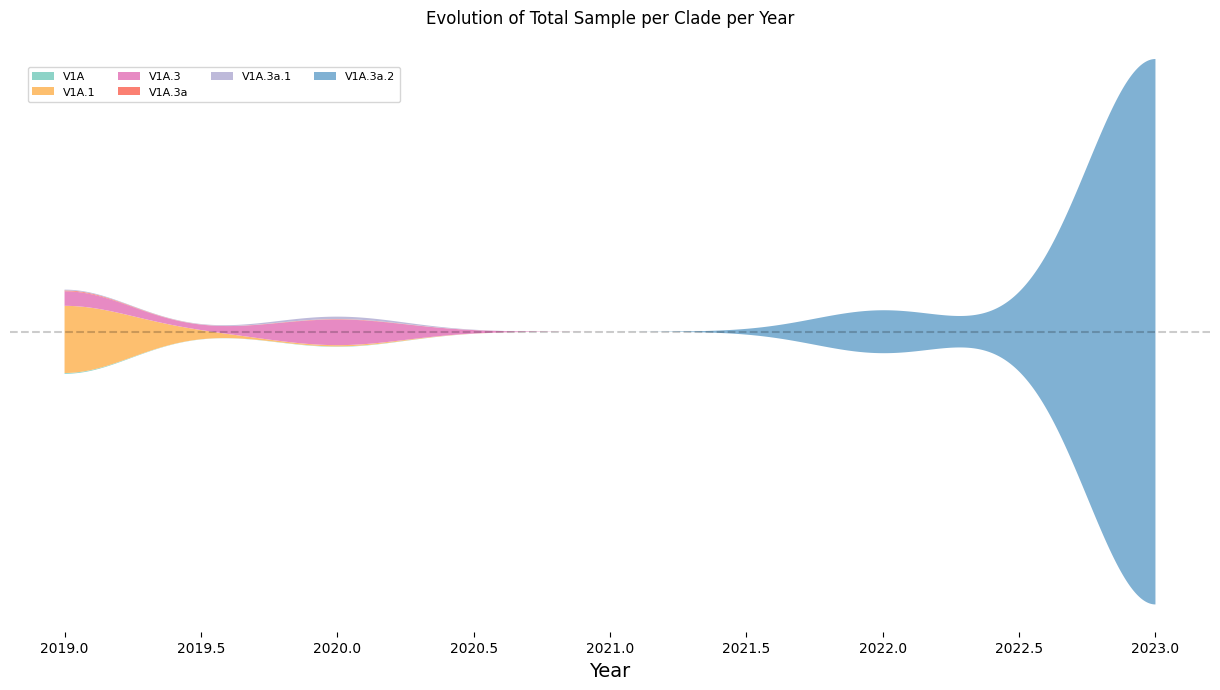

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, interp1d
from scipy import stats


plt.style.use('default')

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)


# Carregar os dados
DATA = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_vic_2019-2023.csv", sep='\t')

# Criar dicionário de clades e amostras
DICT = {}
for v in DATA.values:
    DICT[v[0]] = list(v[1:])

# Criar DataFrame a partir do dicionário
DF = pd.DataFrame.from_dict(DICT)

# Extrair anos e amostras
years = np.array([int(i) for i in DATA.columns[1:]])

# Lista de amostras e nomes dos clades
sample_list = DF.T.values.tolist()
clades = DF.columns

# Calcular os totais normalizados
total_sample_per_clade = np.sum(sample_list, axis=1)
normalized_totals = total_sample_per_clade / np.max(total_sample_per_clade)
cmap = plt.cm.nipy_spectral_r
# Definir as cores para cada clado
'''
clade_colors = {
    "6B.1A.5a.1": "#a6d854",  # Verde claro
    "6B.1A.5a.2a": "#e78ac3",  # Rosa
    "6B.1A.5a.2a.1": "#80b1d3",  # Azul claro
    "6B.1A.2": "#66c2a5",  # Verde suave
    "6B.1A.5": "#fc8d62",  # Laranja
    "6B.1A.5a": "#8da0cb",  # Azul suave
    "6B.1A.5b": "#e38b4f",  # Rosa
    "6B.1A.5a.2": "#ffd92f"  # Amarelo
}

clade_colors = {"3C.2a1b.2a.1": "#E31A1C",
                     "3C.2a1b.2a.1a.1":  "#E6AB02",
                     "3C.2a1b.2a.2" :"#bebada",
                     "3C.2a1b.2a.2c" : "#e78ac3",
                     "3C.2a1b.2a.2b" : "#bebebe",
                     "3C.2a1b.2a.2a" : "#33A02C",
                     "3C.2a1b.2a.2a.2": "#6A3D9A",
                     "3C.2a1b.2a.2a.1" : "#8dd3c7",
                     "3C.2a1b.2a.2a.1a" : "#FB9A99",
                     "3C.2a1b.2a.2a.1b" : "#B2DF8A",
                     "3C.2a1b.2a.2a.3" : "#80b1d3",
                     "3C.2a1b.2a.2a.3b" : "#B15928",
                     "3C.2a1b.2a.2a.3a" : "#1F78B4",
                     "3C.2a1b.2a.2a.3a.1" : "#E7298A",
                     "3C.2a1b.1" : "#feb24c",
                     "3C.2a1b.2" :"#ec7014",
                     "3C.2a1b.2b" : "#ffffb3", 
                     "3C.3a1" :"#6a51a3", 
                     "3C.2a2" : "#4d004b",
                     "3C.2a1b.1a" : "#004529",
                     "3C.2a1b.1b" : "#081d58" }
'''
clade_colors = {
    "V1A" : "#8dd3c7",
                      "V1A.1" : "#fdbf6f",
                      "V1A.3" : "#e78ac3", 
                      "V1A.3a" : "#fb8072",
                      "V1A.3a.1" : "#bebada", 
                      "V1A.3a.2" : "#80b1d3"
}
# Calcular as cores associadas a cada clado
colors = [clade_colors.get(clade, "#000000") for clade in clades]

# Suavizar os dados de cada clade usando spline interpolation
years_smooth = np.linspace(years.min(), years.max(), 1000)

sample_list_smooth = []
for samples in sample_list:
    #spline = make_interp_spline(years, samples, k=3)  # k=3 para spline cúbica
    spline = gaussian_smooth(years, samples, years_smooth, 0.25)  # k=3 para spline cúbica
    #sample_list_smooth.append(spline(years_smooth))
    sample_list_smooth.append(spline)
# Plotar o stackplot suavizado
fig, ax = plt.subplots(figsize=(12, 6), gridspec_kw={'hspace': 1, 'wspace': 0.5})
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
#plt.subplots_adjust(left=0)
ax.stackplot(years_smooth, sample_list_smooth, labels=clades, baseline="sym", colors=colors)

# Remover as bordas (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remover ticks e labels
#ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
#ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

ax.set_title('Evolution of Total Sample per Clade per Year')
ax.set_ylabel('Total Samples', size = 14)
ax.set_xlabel('Year', size = 14)
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(loc='upper left', ncol=4, bbox_to_anchor=(0.01, 0.45, 0.5, 0.5), fontsize=8)
ax.axhline(0, color="black", ls="--", alpha=0.2)
plt.gca().get_yaxis().set_visible(False)
'''
# Adicionar legendas dentro das curvas
for i, clade in enumerate(clades):
    # Calcular a posição x e y para colocar a legenda
    #x_position = np.median(years_smooth)  # Posição x no meio do gráfico
    max_index = np.argmax(sample_list_smooth[i])
    
    # Posição x e y correspondente à maior frequência
    x_position = years_smooth[max_index]
    y_position = sample_list_smooth[i][max_index]
    ax.text(x_position, y_position*0.3, clade, color='black', fontsize=10, ha='center', va='center')

'''

# Ajustar layout para melhorar a visualização
fig.tight_layout()
plt.savefig(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_vic_2019-2023.pdf", format='pdf')
plt.show()

In [338]:
DF

,V1A,V1A.1,V1A.3,V1A.3a,V1A.3a.1,V1A.3a.2
0,1,83,18,1,1,0
1,1,3,63,1,6,0
2,0,0,0,0,0,0
3,0,0,0,0,0,105
4,0,0,0,0,0,674


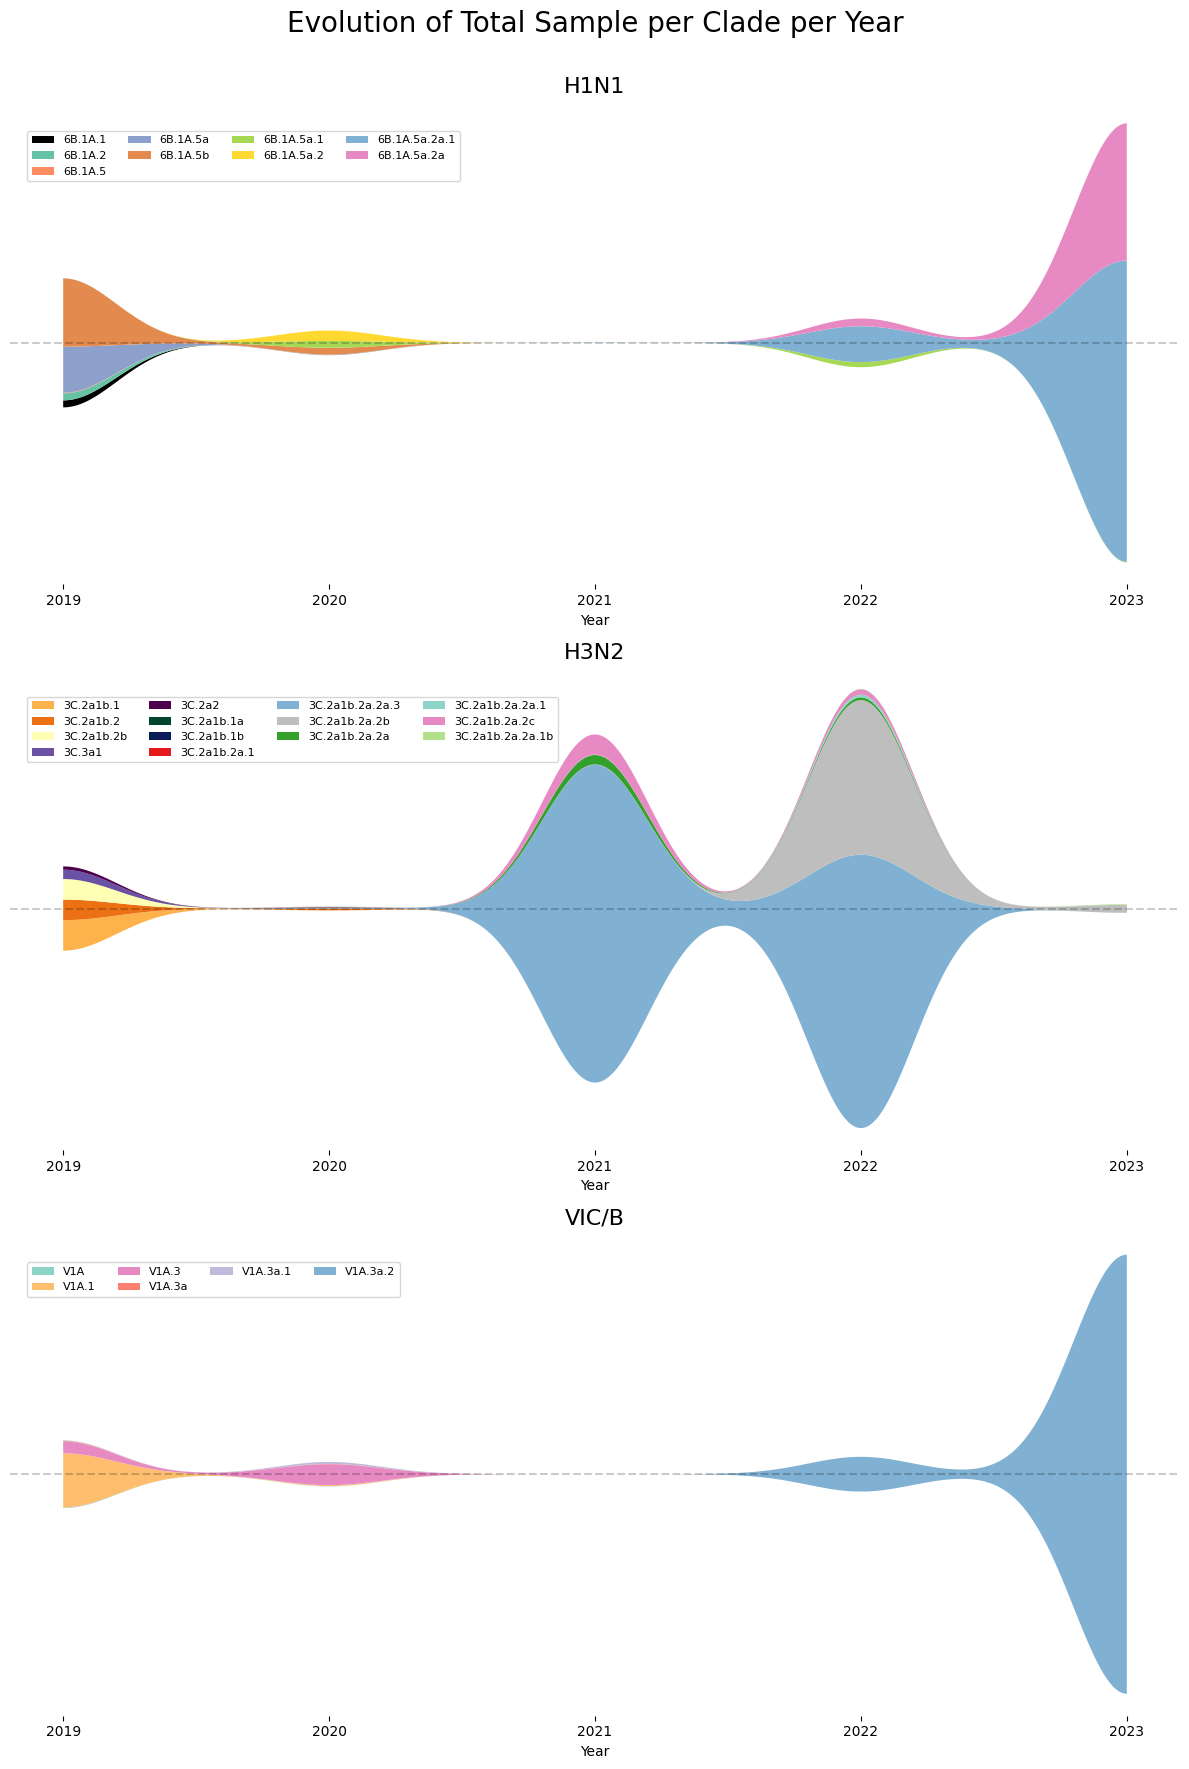

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('default')

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

def plot_stackplot_for_df(df, ax, clade_colors, title):
    # Extrair anos e amostras
    years = np.array([int(i) for i in df.columns[1:]])
    
    DICT = {}
    for v in df.values:
        DICT[v[0]] = list(v[1:])
    
    # Criar DataFrame a partir do dicionário
    df = pd.DataFrame.from_dict(DICT)

    # Lista de amostras e nomes dos clades
    sample_list = df.T.values.tolist()
    clades = df.columns

    # Calcular as cores associadas a cada clado
    colors = [clade_colors.get(clade, "#000000") for clade in clades]

    # Suavizar os dados de cada clade usando gaussian smooth
    years_smooth = np.linspace(years.min(), years.max(), 500)
    
    sample_list_smooth = []
    for samples in sample_list:
        spline = gaussian_smooth(years, samples, years_smooth, 0.2)  # k=3 para spline cúbica
        sample_list_smooth.append(spline)

    # Plotar o stackplot suavizado
    ax.stackplot(years_smooth, sample_list_smooth, labels=clades, baseline="sym", colors=colors)

    # Remover as bordas (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remover ticks e labels
    ax.get_yaxis().set_ticks([])
    ax.get_yaxis().set_ticklabels([])

    ax.set_ylabel('Total Samples', size=10)
    ax.set_xticks(years)
    ax.set_xlabel('Year', size=10)
    ax.set_title(title, size=16, loc='center')
    ax.legend(loc='upper left', ncol=4, bbox_to_anchor=(0.01, 0.45, 0.5, 0.5), fontsize=8)
    ax.axhline(0, color="black", ls="--", alpha=0.2)
    ax.get_yaxis().set_visible(False)

def create_subplots(df_list, clade_colors_list, output_path, titles):
    # Número de subplots (com base no número de dataframes na lista)
    n = len(df_list)
    
    # Definir a grade de subplots (por exemplo, 2 colunas)
    n_cols = 1
    n_rows = int(np.ceil(n / n_cols))  # Ajusta o número de linhas automaticamente

    # Criar a figura e os eixos dos subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    # Certifique-se de que axs seja um array, mesmo se houver apenas um subplot
    if n == 1:
        axs = np.array([axs])

    # Achatar os eixos (caso seja uma matriz 2D)
    axs = axs.flatten()
    
    # Iterar pelos DataFrames e plotar em cada subplot
    for i, df in enumerate(df_list):
        title = titles[i]
        plot_stackplot_for_df(df, axs[i], clade_colors_list[i], title)

    # Ajustar layout para melhor visualização
    fig.suptitle('Evolution of Total Sample per Clade per Year', size=20)
    #plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.975])
    # Salvar o gráfico em arquivo PDF
    plt.savefig(output_path, format='pdf')
    plt.show()


# Exemplo de uso
DATA1 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_h1n1_2019-2023.csv", sep='\t')
DATA2 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_h3n2_2019-2023.csv", sep='\t')
DATA3 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_vic_2019-2023.csv", sep='\t')
df_list = [DATA1, DATA2, DATA3]

# Definir as cores para cada clado
list_colors = [
    {
    "6B.1A.5a.1": "#a6d854",  # Verde claro
    "6B.1A.5a.2a": "#e78ac3",  # Rosa
    "6B.1A.5a.2a.1": "#80b1d3",  # Azul claro
    "6B.1A.2": "#66c2a5",  # Verde suave
    "6B.1A.5": "#fc8d62",  # Laranja
    "6B.1A.5a": "#8da0cb",  # Azul suave
    "6B.1A.5b": "#e38b4f",  # Rosa
    "6B.1A.5a.2": "#ffd92f"  # Amarelo
    }, 
    {
    "3C.2a1b.2a.1": "#E31A1C",
     "3C.2a1b.2a.1a.1":  "#E6AB02",
     "3C.2a1b.2a.2" :"#bebada",
     "3C.2a1b.2a.2c" : "#e78ac3",
     "3C.2a1b.2a.2b" : "#bebebe",
     "3C.2a1b.2a.2a" : "#33A02C",
     "3C.2a1b.2a.2a.2": "#6A3D9A",
     "3C.2a1b.2a.2a.1" : "#8dd3c7",
     "3C.2a1b.2a.2a.1a" : "#FB9A99",
     "3C.2a1b.2a.2a.1b" : "#B2DF8A",
     "3C.2a1b.2a.2a.3" : "#80b1d3",
     "3C.2a1b.2a.2a.3b" : "#B15928",
     "3C.2a1b.2a.2a.3a" : "#1F78B4",
     "3C.2a1b.2a.2a.3a.1" : "#E7298A",
     "3C.2a1b.1" : "#feb24c",
     "3C.2a1b.2" :"#ec7014",
     "3C.2a1b.2b" : "#ffffb3", 
     "3C.3a1" :"#6a51a3", 
     "3C.2a2" : "#4d004b",
     "3C.2a1b.1a" : "#004529",
     "3C.2a1b.1b" : "#081d58" 
    },
    {
    "V1A": "#8dd3c7",
    "V1A.1": "#fdbf6f",
    "V1A.3": "#e78ac3",
    "V1A.3a": "#fb8072",
    "V1A.3a.1": "#bebada",
    "V1A.3a.2": "#80b1d3"
    }
]

# Caminho de saída para o arquivo PDF
output_path = r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_subplots.pdf"

# Chamar a função para gerar os subplots
titles=['H1N1', 'H3N2', 'VIC/B']
create_subplots(df_list, list_colors, output_path, titles)


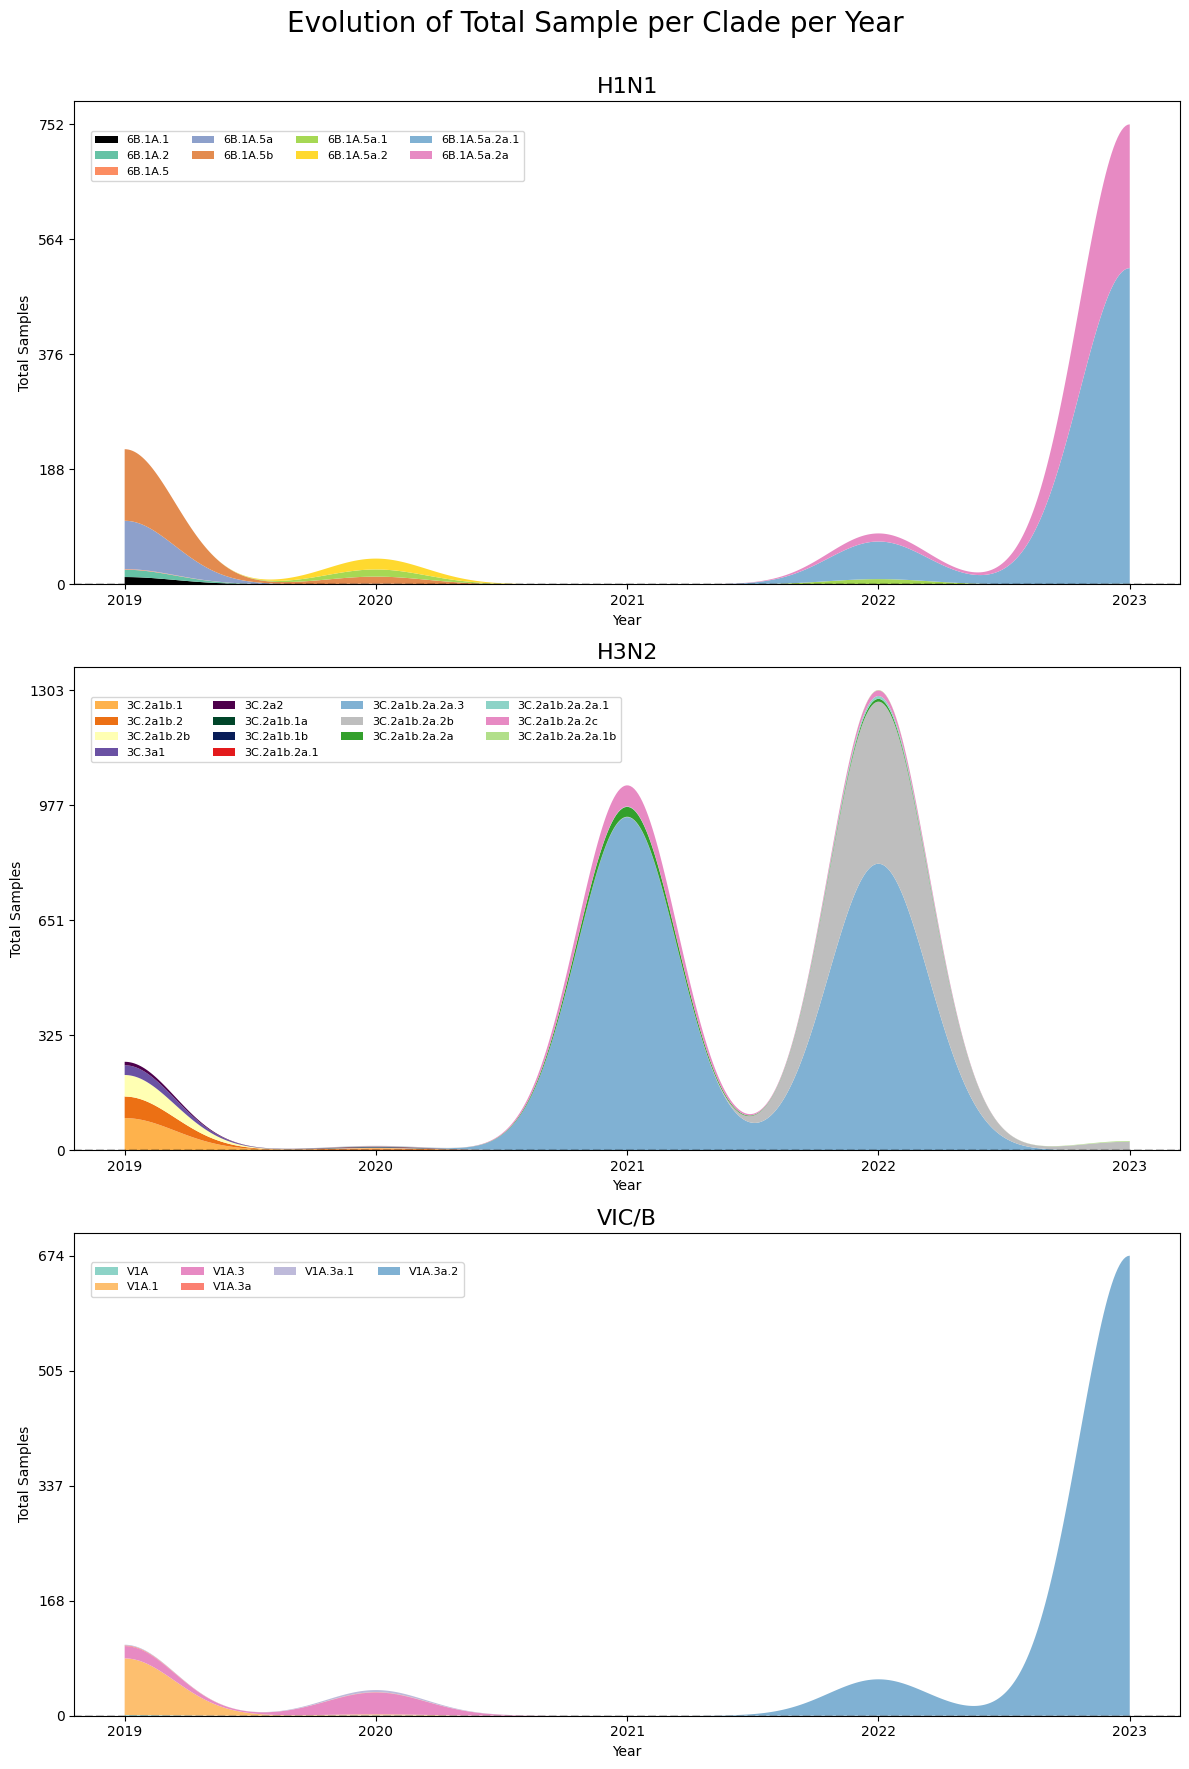

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('default')

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

def plot_stackplot_for_df(df, ax, clade_colors, title):
    # Extrair anos e amostras
    years = np.array([int(i) for i in df.columns[1:]])

    DICT = {}
    for v in df.values:
        DICT[v[0]] = list(v[1:])

    # Criar DataFrame a partir do dicionário
    df = pd.DataFrame.from_dict(DICT)

    # Lista de amostras e nomes dos clades
    sample_list = df.T.values.tolist()
    clades = df.columns

    # Calcular as cores associadas a cada clado
    colors = [clade_colors.get(clade, "#000000") for clade in clades]

    # Suavizar os dados de cada clade usando gaussian smooth
    years_smooth = np.linspace(years.min(), years.max(), 500)
    
    sample_list_smooth = []
    for samples in sample_list:
        spline = gaussian_smooth(years, samples, years_smooth, 0.2)
        sample_list_smooth.append(spline)

    # Plotar o stackplot suavizado com baseline padrão
    ax.stackplot(years_smooth, sample_list_smooth, labels=clades, baseline="zero", colors=colors)

    # Calcular o total de sequências por ano (somatório das colunas)
    total_sequences_smooth = np.sum(sample_list_smooth, axis=0)
    total_sequences = np.sum(sample_list, axis=0)

    # Remover as bordas (spines)
    #for spine in ax.spines.values():
    #    spine.set_visible(False)

    # Exibir rótulos e ticks do eixo Y mostrando a contagem total de sequências
    ax.set_ylabel('Total Samples', size=10)
    ax.set_yticks(np.linspace(0, total_sequences_smooth.max(), num=5))  # Ticks baseados no total
    ax.set_yticklabels([int(tick) for tick in np.linspace(0, total_sequences.max(), num=5)])  # Rótulos formatados

    # Configurar os ticks e rótulos dos eixos X
    ax.set_xticks(years)
    ax.set_xlabel('Year', size=10)
    ax.set_title(title, size=16, loc='center')
    ax.legend(loc='upper left', ncol=4, bbox_to_anchor=(0.01, 0.45, 0.5, 0.5), fontsize=8)
    ax.axhline(0, color="black", ls="--", alpha=0.2)

def create_subplots(df_list, clade_colors_list, output_path, titles):
    # Número de subplots (com base no número de dataframes na lista)
    n = len(df_list)
    
    # Definir a grade de subplots (por exemplo, 2 colunas)
    n_cols = 1
    n_rows = int(np.ceil(n / n_cols))  # Ajusta o número de linhas automaticamente

    # Criar a figura e os eixos dos subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    # Certifique-se de que axs seja um array, mesmo se houver apenas um subplot
    if n == 1:
        axs = np.array([axs])

    # Achatar os eixos (caso seja uma matriz 2D)
    axs = axs.flatten()
    
    # Iterar pelos DataFrames e plotar em cada subplot
    for i, df in enumerate(df_list):
        title = titles[i]
        plot_stackplot_for_df(df, axs[i], clade_colors_list[i], title)

    # Ajustar layout para melhor visualização
    fig.suptitle('Evolution of Total Sample per Clade per Year', size=20)
    plt.tight_layout(rect=[0, 0, 1, 0.975])
    
    # Salvar o gráfico em arquivo PDF
    plt.savefig(output_path, format='pdf')
    plt.show()

# Exemplo de uso
DATA1 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_h1n1_2019-2023.csv", sep='\t')
DATA2 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_h3n2_2019-2023.csv", sep='\t')
DATA3 = pd.read_csv(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_vic_2019-2023.csv", sep='\t')
df_list = [DATA1, DATA2, DATA3]

# Definir as cores para cada clado
list_colors = [
    {
    "6B.1A.5a.1": "#a6d854",  # Verde claro
    "6B.1A.5a.2a": "#e78ac3",  # Rosa
    "6B.1A.5a.2a.1": "#80b1d3",  # Azul claro
    "6B.1A.2": "#66c2a5",  # Verde suave
    "6B.1A.5": "#fc8d62",  # Laranja
    "6B.1A.5a": "#8da0cb",  # Azul suave
    "6B.1A.5b": "#e38b4f",  # Rosa
    "6B.1A.5a.2": "#ffd92f"  # Amarelo
    }, 
    {
    "3C.2a1b.2a.1": "#E31A1C",
     "3C.2a1b.2a.1a.1":  "#E6AB02",
     "3C.2a1b.2a.2" :"#bebada",
     "3C.2a1b.2a.2c" : "#e78ac3",
     "3C.2a1b.2a.2b" : "#bebebe",
     "3C.2a1b.2a.2a" : "#33A02C",
     "3C.2a1b.2a.2a.2": "#6A3D9A",
     "3C.2a1b.2a.2a.1" : "#8dd3c7",
     "3C.2a1b.2a.2a.1a" : "#FB9A99",
     "3C.2a1b.2a.2a.1b" : "#B2DF8A",
     "3C.2a1b.2a.2a.3" : "#80b1d3",
     "3C.2a1b.2a.2a.3b" : "#B15928",
     "3C.2a1b.2a.2a.3a" : "#1F78B4",
     "3C.2a1b.2a.2a.3a.1" : "#E7298A",
     "3C.2a1b.1" : "#feb24c",
     "3C.2a1b.2" :"#ec7014",
     "3C.2a1b.2b" : "#ffffb3", 
     "3C.3a1" :"#6a51a3", 
     "3C.2a2" : "#4d004b",
     "3C.2a1b.1a" : "#004529",
     "3C.2a1b.1b" : "#081d58" 
    },
    {
    "V1A": "#8dd3c7",
    "V1A.1": "#fdbf6f",
    "V1A.3": "#e78ac3",
    "V1A.3a": "#fb8072",
    "V1A.3a.1": "#bebada",
    "V1A.3a.2": "#80b1d3"
    }
]

# Caminho de saída para o arquivo PDF
output_path = r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/streamgraph/streamgraph_subplots_yaxis_zero.pdf"

# Chamar a função para gerar os subplots
titles=['H1N1', 'H3N2', 'VIC/B']
create_subplots(df_list, list_colors, output_path, titles)


In [ ]:
OUTFILE = open(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/dNdS/Vic_br/vic_raw_ha_br_CDS_witoutN.fasta", "w")
nucleotides = ['a', 't', 'c', 'g']
for s in SeqIO.parse(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/dNdS/Vic_br/vic_raw_ha_br_CDS.fasta", "fasta"):
    header = str(s.description)
    seq = str(s.seq)
    uniq_nucl = list(set(seq.lower()))
    if  len(seq) % 3 == 0 and len(uniq_nucl)==4 and uniq_nucl[0] in nucleotides and uniq_nucl[1] in nucleotides and uniq_nucl[2] in nucleotides and uniq_nucl[3] in nucleotides:
        #print(header, uniq_nucl)
        OUTFILE.write(">"+header+"\n")
        OUTFILE.write(seq+"\n")
OUTFILE.close()

In [ ]:
OUTFILE = open(r"C:/Users/vinicius.souza/Documents/Influenza/paper_isa/dNdS/Vic_br/vic_raw_ha_br_CDS_witoutN_NR_NotStop.fasta", "w")
for k in ALN.keys():
    header = str(ALN[k])
    seq = str(k).lower()
    if seq[-3:] in ['taa', 'tag', 'tga']:
        seq=seq[:-3]
    OUTFILE.write(">"+header+"\n")
    OUTFILE.write(seq+"\n")
OUTFILE.close()

In [412]:
DATA3

,Lineages,2019,2020,2021,2022,2023
0,V1A,1,1,0,0,0
1,V1A.1,83,3,0,0,0
2,V1A.3,18,63,0,0,0
3,V1A.3a,1,1,0,0,0
4,V1A.3a.1,1,6,0,0,0
5,V1A.3a.2,0,0,0,105,674
